# Data loading

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

df = pd.read_csv('2019-airline-delays-and-cancellations/flights_sample.csv')
df.shape

(1186213, 40)

In [3]:
df.head(5)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_AIRPORT_ID,ARR_AIRPORT_ID,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,AIRLINE_ID,CARRIER_NAME,PRCP_DEP,SNOW_DEP,SNWD_DEP,TMAX_DEP,TMIN_DEP,WDF2_DEP,WSF2_DEP,AWND_DEP,PRCP_ARR,SNOW_ARR,SNWD_ARR,TMAX_ARR,TMIN_ARR,WDF2_ARR,WSF2_ARR,AWND_ARR,ARR_DEL15,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,ARR_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST,ARR_BLOCK_HIST
0,9,30,1,11057,11292,1615.0,0.0,0.0,1600-1659,1737.0,0.0,1700-1759,1337.0,6,4.0,19977,United Air Lines Inc.,0.00,0.0,0.0,91.0,70.0,70.0,12.1,5.82,0.00,0.0,0.0,76.0,50.0,30.0,25.1,11.41,0,0.167208,0.138449,0.143890,0.135100,0.179688,0.156900
1,8,30,5,13495,10821,1321.0,6.0,0.0,1300-1359,1640.0,0.0,1600-1659,998.0,4,3.0,19393,Southwest Airlines Co.,0.00,0.0,0.0,95.0,75.0,30.0,13.0,4.70,0.00,0.0,0.0,91.0,58.0,270.0,14.1,4.70,0,0.192353,0.163102,0.183021,0.212659,0.197496,0.179450
2,3,13,3,11057,11618,1309.0,84.0,1.0,1100-1159,1457.0,67.0,1400-1459,529.0,3,2.0,19805,American Airlines Inc.,0.00,0.0,0.0,66.0,34.0,170.0,14.1,5.59,0.00,0.0,0.0,47.0,28.0,130.0,14.1,5.14,1,0.189410,0.179731,0.265083,0.152191,0.165468,0.152607
3,12,13,5,11057,10257,2210.0,1.0,0.0,2200-2259,2350.0,0.0,2300-2359,646.0,3,2.0,19805,American Airlines Inc.,1.73,0.0,0.0,43.0,34.0,50.0,16.1,8.28,0.04,0.0,0.0,40.0,30.0,160.0,18.1,6.26,0,0.176659,0.182110,0.244121,0.190847,0.289847,0.304861
4,3,7,4,11057,10994,745.0,0.0,0.0,0700-0759,853.0,0.0,0800-0859,168.0,1,2.0,20417,Comair Inc.,0.00,0.0,0.0,54.0,28.0,120.0,13.0,5.37,0.00,0.0,0.0,63.0,31.0,170.0,15.0,3.80,0,0.171451,0.179731,0.170961,0.179561,0.086026,0.060502


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186213 entries, 0 to 1186212
Data columns (total 40 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   MONTH               1186213 non-null  int64  
 1   DAY_OF_MONTH        1186213 non-null  int64  
 2   DAY_OF_WEEK         1186213 non-null  int64  
 3   DEP_AIRPORT_ID      1186213 non-null  int64  
 4   ARR_AIRPORT_ID      1186213 non-null  int64  
 5   DEP_TIME            1186213 non-null  float64
 6   DEP_DELAY_NEW       1186213 non-null  float64
 7   DEP_DEL15           1186213 non-null  float64
 8   DEP_TIME_BLK        1186213 non-null  object 
 9   ARR_TIME            1186213 non-null  float64
 10  ARR_DELAY_NEW       1186213 non-null  float64
 11  ARR_TIME_BLK        1186213 non-null  object 
 12  DISTANCE            1186213 non-null  float64
 13  DISTANCE_GROUP      1186213 non-null  int64  
 14  SEGMENT_NUMBER      1186213 non-null  float64
 15  AIRLINE_ID     

Text(0, 0.5, 'Freq')

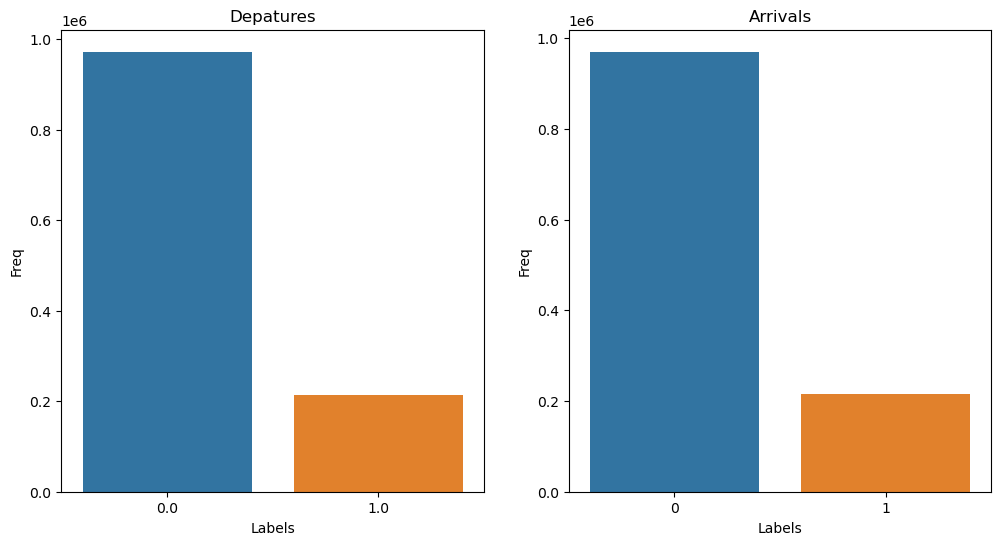

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
f, (ax,ax1) = plt.subplots(1,2, figsize=(12,6))
dep = sns.countplot(df['DEP_DEL15'], ax=ax)
dep.set_title('Depatures')
dep.set_xlabel('Labels')
dep.set_ylabel('Freq')

arr = sns.countplot(df['ARR_DEL15'], ax=ax1)
arr.set_title('Arrivals')
arr.set_xlabel('Labels')
arr.set_ylabel('Freq')

# Working with a balanced dataset

In [5]:
balanced = df.loc[df['ARR_DEL15'] == 1]
balanced.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_AIRPORT_ID,ARR_AIRPORT_ID,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,AIRLINE_ID,CARRIER_NAME,PRCP_DEP,SNOW_DEP,SNWD_DEP,TMAX_DEP,TMIN_DEP,WDF2_DEP,WSF2_DEP,AWND_DEP,PRCP_ARR,SNOW_ARR,SNWD_ARR,TMAX_ARR,TMIN_ARR,WDF2_ARR,WSF2_ARR,AWND_ARR,ARR_DEL15,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,ARR_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST,ARR_BLOCK_HIST
2,3,13,3,11057,11618,1309.0,84.0,1.0,1100-1159,1457.0,67.0,1400-1459,529.0,3,2.0,19805,American Airlines Inc.,0.00,0.0,0.0,66.0,34.0,170.0,14.1,5.59,0.00,0.0,0.0,47.0,28.0,130.0,14.1,5.14,1,0.189410,0.179731,0.265083,0.152191,0.165468,0.152607
13,7,30,2,12266,11618,2005.0,95.0,1.0,1800-1859,105.0,116.0,0001-0559,1400.0,6,5.0,19977,United Air Lines Inc.,0.00,0.0,0.0,91.0,80.0,60.0,25.1,13.65,0.00,0.0,0.0,95.0,75.0,100.0,21.0,8.72,1,0.233495,0.227018,0.304226,0.202498,0.332019,0.528310
15,8,5,1,12889,12892,1656.0,49.0,1.0,1600-1659,1802.0,33.0,1800-1859,236.0,1,3.0,19805,American Airlines Inc.,0.00,0.0,0.0,113.0,86.0,260.0,19.9,6.93,0.00,0.0,0.0,71.0,62.0,260.0,21.0,8.95,1,0.227793,0.196139,0.185519,0.180121,0.270536,0.245090
16,1,7,2,12892,14893,1216.0,194.0,1.0,0900-0959,1339.0,173.0,1300-1359,373.0,2,2.0,20304,SkyWest Airlines Inc.,0.21,0.0,0.0,60.0,51.0,60.0,17.0,7.83,0.00,0.0,0.0,57.0,47.0,180.0,19.9,8.50,1,0.148681,0.132809,0.109951,0.093747,0.103935,0.106000
22,3,9,6,12892,11638,2116.0,86.0,1.0,1900-1959,2212.0,69.0,2200-2259,209.0,1,6.0,20304,SkyWest Airlines Inc.,0.00,0.0,0.0,61.0,47.0,270.0,19.9,10.29,0.12,0.0,0.0,57.0,40.0,160.0,16.1,6.49,1,0.178138,0.205401,0.209514,0.190346,0.245836,0.259848


In [6]:
balanced.shape

(216118, 40)

In [7]:
balanced_no_delay = df.loc[df['ARR_DEL15'] == 0][:216118]
balanced_no_delay.shape

(216118, 40)

In [8]:
balanced = pd.concat([balanced, balanced_no_delay])

In [9]:
balanced = balanced.sort_index()
balanced.tail()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_AIRPORT_ID,ARR_AIRPORT_ID,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,AIRLINE_ID,CARRIER_NAME,PRCP_DEP,SNOW_DEP,SNWD_DEP,TMAX_DEP,TMIN_DEP,WDF2_DEP,WSF2_DEP,AWND_DEP,PRCP_ARR,SNOW_ARR,SNWD_ARR,TMAX_ARR,TMIN_ARR,WDF2_ARR,WSF2_ARR,AWND_ARR,ARR_DEL15,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,ARR_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST,ARR_BLOCK_HIST
1186197,11,28,4,15370,12266,915.0,0.0,0.0,0900-0959,1121.0,27.0,1100-1159,429.0,2,1.0,20366,Atlantic Southeast Airlines,0.17,0.0,0.0,41.0,36.0,90.0,16.1,9.17,0.00,0.0,0.0,88.0,75.0,60.0,16.1,7.83,1,0.180221,0.105900,0.130479,0.141108,0.114738,0.104582
1186209,6,29,6,12191,12339,2243.0,168.0,1.0,1900-1959,151.0,161.0,0001-0559,861.0,4,5.0,19393,Southwest Airlines Co.,0.26,0.0,0.0,89.0,71.0,60.0,30.0,5.82,0.00,0.0,0.0,90.0,70.0,270.0,19.9,8.95,1,0.259999,0.341019,0.259370,0.233141,0.393186,0.573245
1186210,12,8,7,12478,12892,1434.0,0.0,0.0,1400-1459,1812.0,16.0,1800-1859,2475.0,10,1.0,20409,JetBlue Airways,0.00,0.0,0.0,44.0,28.0,160.0,18.1,7.16,0.05,0.0,0.0,65.0,58.0,270.0,23.0,8.72,1,0.303259,0.221606,0.237173,0.223586,0.236550,0.221787
1186211,3,13,3,15370,12266,750.0,50.0,1.0,0700-0759,1005.0,83.0,1000-1059,429.0,2,1.0,19977,United Air Lines Inc.,1.24,0.0,0.0,68.0,48.0,200.0,44.1,27.96,0.02,0.0,0.0,84.0,66.0,70.0,21.0,10.51,1,0.184517,0.111111,0.179126,0.152191,0.086026,0.111288
1186212,2,13,4,13577,10397,1144.0,14.0,0.0,1100-1159,1309.0,16.0,1300-1359,317.0,2,3.0,19790,Delta Air Lines Inc.,0.00,0.0,14.2,20.0,4.0,300.0,15.0,7.61,0.00,0.0,0.0,56.0,36.0,320.0,21.9,11.41,1,0.125538,0.189922,0.148550,0.238772,0.139820,0.121892


In [12]:
balanced = encode(balanced)
balanced.head()

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY_NEW,DEP_DEL15,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,AIRLINE_ID,PRCP_DEP,SNOW_DEP,SNWD_DEP,TMAX_DEP,TMIN_DEP,WDF2_DEP,WSF2_DEP,AWND_DEP,PRCP_ARR,SNOW_ARR,SNWD_ARR,TMAX_ARR,TMIN_ARR,WDF2_ARR,WSF2_ARR,AWND_ARR,ARR_DEL15,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,ARR_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST,ARR_BLOCK_HIST,DEP_AIRPORT_10140,DEP_AIRPORT_10257,DEP_AIRPORT_10299,DEP_AIRPORT_10397,DEP_AIRPORT_10423,DEP_AIRPORT_10529,DEP_AIRPORT_10599,DEP_AIRPORT_10693,DEP_AIRPORT_10713,DEP_AIRPORT_10721,DEP_AIRPORT_10792,DEP_AIRPORT_10800,DEP_AIRPORT_10821,DEP_AIRPORT_10994,DEP_AIRPORT_11042,DEP_AIRPORT_11057,DEP_AIRPORT_11066,DEP_AIRPORT_11193,DEP_AIRPORT_11259,DEP_AIRPORT_11267,DEP_AIRPORT_11278,DEP_AIRPORT_11292,DEP_AIRPORT_11298,DEP_AIRPORT_11423,DEP_AIRPORT_11433,DEP_AIRPORT_11540,DEP_AIRPORT_11618,DEP_AIRPORT_11638,DEP_AIRPORT_11697,DEP_AIRPORT_11884,DEP_AIRPORT_11986,DEP_AIRPORT_11995,DEP_AIRPORT_11996,DEP_AIRPORT_12173,DEP_AIRPORT_12191,DEP_AIRPORT_12264,DEP_AIRPORT_12266,DEP_AIRPORT_12339,DEP_AIRPORT_12451,DEP_AIRPORT_12478,DEP_AIRPORT_12758,DEP_AIRPORT_12889,DEP_AIRPORT_12892,DEP_AIRPORT_12953,DEP_AIRPORT_12954,DEP_AIRPORT_12982,DEP_AIRPORT_12992,DEP_AIRPORT_13198,DEP_AIRPORT_13204,DEP_AIRPORT_13232,DEP_AIRPORT_13244,DEP_AIRPORT_13303,DEP_AIRPORT_13342,DEP_AIRPORT_13485,DEP_AIRPORT_13487,DEP_AIRPORT_13495,DEP_AIRPORT_13577,DEP_AIRPORT_13796,DEP_AIRPORT_13830,DEP_AIRPORT_13851,DEP_AIRPORT_13871,DEP_AIRPORT_13891,DEP_AIRPORT_13930,DEP_AIRPORT_13931,DEP_AIRPORT_14027,DEP_AIRPORT_14057,DEP_AIRPORT_14100,DEP_AIRPORT_14107,DEP_AIRPORT_14122,DEP_AIRPORT_14193,DEP_AIRPORT_14262,DEP_AIRPORT_14307,DEP_AIRPORT_14321,DEP_AIRPORT_14492,DEP_AIRPORT_14524,DEP_AIRPORT_14570,DEP_AIRPORT_14576,DEP_AIRPORT_14635,DEP_AIRPORT_14679,DEP_AIRPORT_14683,DEP_AIRPORT_14685,DEP_AIRPORT_14730,DEP_AIRPORT_14747,DEP_AIRPORT_14761,DEP_AIRPORT_14771,DEP_AIRPORT_14831,DEP_AIRPORT_14869,DEP_AIRPORT_14893,DEP_AIRPORT_14908,DEP_AIRPORT_15016,DEP_AIRPORT_15096,DEP_AIRPORT_15304,DEP_AIRPORT_15370,DEP_AIRPORT_15376,DEP_AIRPORT_15412,DEP_AIRPORT_15919,ARR_AIRPORT_10140,ARR_AIRPORT_10257,ARR_AIRPORT_10299,ARR_AIRPORT_10397,ARR_AIRPORT_10423,ARR_AIRPORT_10529,ARR_AIRPORT_10599,ARR_AIRPORT_10693,ARR_AIRPORT_10713,ARR_AIRPORT_10721,ARR_AIRPORT_10792,ARR_AIRPORT_10800,ARR_AIRPORT_10821,ARR_AIRPORT_10994,ARR_AIRPORT_11042,ARR_AIRPORT_11057,ARR_AIRPORT_11066,ARR_AIRPORT_11193,ARR_AIRPORT_11259,ARR_AIRPORT_11267,ARR_AIRPORT_11278,ARR_AIRPORT_11292,ARR_AIRPORT_11298,ARR_AIRPORT_11423,ARR_AIRPORT_11433,ARR_AIRPORT_11540,ARR_AIRPORT_11618,ARR_AIRPORT_11638,ARR_AIRPORT_11697,ARR_AIRPORT_11884,ARR_AIRPORT_11986,ARR_AIRPORT_11995,ARR_AIRPORT_11996,ARR_AIRPORT_12173,ARR_AIRPORT_12191,ARR_AIRPORT_12264,ARR_AIRPORT_12266,ARR_AIRPORT_12339,ARR_AIRPORT_12451,ARR_AIRPORT_12478,ARR_AIRPORT_12758,ARR_AIRPORT_12889,ARR_AIRPORT_12892,ARR_AIRPORT_12953,ARR_AIRPORT_12954,ARR_AIRPORT_12982,ARR_AIRPORT_12992,ARR_AIRPORT_13198,ARR_AIRPORT_13204,ARR_AIRPORT_13232,ARR_AIRPORT_13244,ARR_AIRPORT_13303,ARR_AIRPORT_13342,ARR_AIRPORT_13485,ARR_AIRPORT_13487,ARR_AIRPORT_13495,ARR_AIRPORT_13577,ARR_AIRPORT_13796,ARR_AIRPORT_13830,ARR_AIRPORT_13851,ARR_AIRPORT_13871,ARR_AIRPORT_13891,ARR_AIRPORT_13930,ARR_AIRPORT_13931,ARR_AIRPORT_14027,ARR_AIRPORT_14057,ARR_AIRPORT_14100,ARR_AIRPORT_14107,ARR_AIRPORT_14122,ARR_AIRPORT_14193,ARR_AIRPORT_14262,ARR_AIRPORT_14307,ARR_AIRPORT_14321,ARR_AIRPORT_14492,ARR_AIRPORT_14524,ARR_AIRPORT_14570,ARR_AIRPORT_14576,ARR_AIRPORT_14635,ARR_AIRPORT_14679,ARR_AIRPORT_14683,ARR_AIRPORT_14685,ARR_AIRPORT_14730,ARR_AIRPORT_14747,ARR_AIRPORT_14761,ARR_AIRPORT_14771,ARR_AIRPORT_14831,ARR_AIRPORT_14869,ARR_AIRPORT_14893,ARR_AIRPORT_14908,ARR_AIRPORT_15016,ARR_AIRPORT_15096,ARR_AIRPORT_15304,ARR_AIRPORT_15370,ARR_AIRPORT_15376,ARR_AIRPORT_15412,ARR_AIRPORT_15919,DEP_TIME_0001-0559,DEP_TIME_0600-0659,DEP_TIME_0700-0759,DEP_TIME_0800-0859,DEP_TIME_0900-0959,DEP_TIME_1000-1059,DEP_TIME_1100-1159,DEP_TIME_1200-1259,DEP_TIME_1300-1359,DEP_TIME_1400-1459,DE

In [13]:
from sklearn.model_selection import train_test_split

y = balanced['ARR_DEL15']
X = balanced.drop(['ARR_DEL15', 'ARR_TIME_Nan'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier

forest_clf_bal = RandomForestClassifier(max_depth=20, random_state=42)
forest_clf_bal.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [16]:
from sklearn.metrics import classification_report

y_pred = forest_clf_bal.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88     53897
           1       0.94      0.80      0.86     54162

    accuracy                           0.87    108059
   macro avg       0.88      0.87      0.87    108059
weighted avg       0.88      0.87      0.87    108059



In [17]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[51027,  2870],
       [10704, 43458]], dtype=int64)

In [31]:
from sklearn.metrics import roc_auc_score

pred_prob = forest_clf_bal.predict_proba(X_test)
roc_auc_score(y_test, pred_prob[:,1])

0.9457677667955919

In [18]:
import rfpimp
rfpimp.importances(forest_clf_bal, X_test, y_test)

,Importance
Feature,
DEP_DELAY_NEW,0.1912
DEP_DEL15,0.0398
PRCP_ARR,0.0024
AWND_DEP,0.0020
TMIN_ARR,0.0018
...,...
ARR_AIRPORT_14107,-0.0002
ARR_AIRPORT_11618,-0.0002
ARR_AIRPORT_12953,-0.0002


In [22]:
(len(balanced.loc[(balanced.ARR_DEL15 == 1) & (balanced.DEP_DEL15 == 1)]) + len(balanced.loc[(balanced.ARR_DEL15 == 0) & (balanced.DEP_DEL15 == 0)])) / len(balanced)

0.8671026938987035

In [25]:
from sklearn.metrics import accuracy_score

acc_sgd = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_sgd

87.44

# Data preparation

In [5]:
import regex as re

def encode(df):
    dep_airport_ohe = pd.get_dummies(df['DEP_AIRPORT_ID'])
    arr_airport_ohe = pd.get_dummies(df['ARR_AIRPORT_ID'])
    dep_airport_ohe = dep_airport_ohe.rename(columns=lambda x: re.sub("^", "DEP_AIRPORT_", str(x)))
    arr_airport_ohe = arr_airport_ohe.rename(columns=lambda x: re.sub("^", "ARR_AIRPORT_", str(x)))
    df = df.drop(['MONTH','CARRIER_NAME', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'AIRLINE_ID'], axis=1)
    df = pd.concat([df, dep_airport_ohe], axis=1)
    df = pd.concat([df, arr_airport_ohe], axis=1)
    
    dep_time_block = pd.get_dummies(df['DEP_TIME_BLK'])
    arr_time_block = pd.get_dummies(df['ARR_TIME_BLK'])
    dep_time_block = dep_time_block.rename(columns=lambda x: re.sub("^", "DEP_TIME_", str(x)))
    arr_time_block = arr_time_block.rename(columns=lambda x: re.sub("^", "ARR_TIME_", str(x)))
    df = pd.concat([df, dep_time_block], axis=1)
    df = pd.concat([df, arr_time_block], axis=1)
    df.drop(['DEP_AIRPORT_ID', 'ARR_AIRPORT_ID', 'DEP_TIME', 'DEP_TIME_BLK', 
             'ARR_TIME', 'ARR_TIME_BLK'], axis=1, inplace=True)
    
    return df


In [6]:
df = encode(df)
df.head()

,DEP_DELAY_NEW,DEP_DEL15,ARR_DELAY_NEW,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,PRCP_DEP,SNOW_DEP,SNWD_DEP,TMAX_DEP,TMIN_DEP,WDF2_DEP,WSF2_DEP,AWND_DEP,PRCP_ARR,SNOW_ARR,SNWD_ARR,TMAX_ARR,TMIN_ARR,WDF2_ARR,WSF2_ARR,AWND_ARR,ARR_DEL15,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,ARR_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST,ARR_BLOCK_HIST,DEP_AIRPORT_10140,DEP_AIRPORT_10257,DEP_AIRPORT_10299,DEP_AIRPORT_10397,DEP_AIRPORT_10423,DEP_AIRPORT_10529,DEP_AIRPORT_10599,DEP_AIRPORT_10693,DEP_AIRPORT_10713,DEP_AIRPORT_10721,DEP_AIRPORT_10792,DEP_AIRPORT_10800,DEP_AIRPORT_10821,DEP_AIRPORT_10994,DEP_AIRPORT_11042,DEP_AIRPORT_11057,DEP_AIRPORT_11066,DEP_AIRPORT_11193,DEP_AIRPORT_11259,DEP_AIRPORT_11267,DEP_AIRPORT_11278,DEP_AIRPORT_11292,DEP_AIRPORT_11298,DEP_AIRPORT_11423,DEP_AIRPORT_11433,DEP_AIRPORT_11540,DEP_AIRPORT_11618,DEP_AIRPORT_11638,DEP_AIRPORT_11697,DEP_AIRPORT_11884,DEP_AIRPORT_11986,DEP_AIRPORT_11995,DEP_AIRPORT_11996,DEP_AIRPORT_12173,DEP_AIRPORT_12191,DEP_AIRPORT_12264,DEP_AIRPORT_12266,DEP_AIRPORT_12339,DEP_AIRPORT_12451,DEP_AIRPORT_12478,DEP_AIRPORT_12758,DEP_AIRPORT_12889,DEP_AIRPORT_12892,DEP_AIRPORT_12953,DEP_AIRPORT_12954,DEP_AIRPORT_12982,DEP_AIRPORT_12992,DEP_AIRPORT_13198,DEP_AIRPORT_13204,DEP_AIRPORT_13232,DEP_AIRPORT_13244,DEP_AIRPORT_13303,DEP_AIRPORT_13342,DEP_AIRPORT_13485,DEP_AIRPORT_13487,DEP_AIRPORT_13495,DEP_AIRPORT_13577,DEP_AIRPORT_13796,DEP_AIRPORT_13830,DEP_AIRPORT_13851,DEP_AIRPORT_13871,DEP_AIRPORT_13891,DEP_AIRPORT_13930,DEP_AIRPORT_13931,DEP_AIRPORT_14027,DEP_AIRPORT_14057,DEP_AIRPORT_14100,DEP_AIRPORT_14107,DEP_AIRPORT_14122,DEP_AIRPORT_14193,DEP_AIRPORT_14262,DEP_AIRPORT_14307,DEP_AIRPORT_14321,DEP_AIRPORT_14492,DEP_AIRPORT_14524,DEP_AIRPORT_14570,DEP_AIRPORT_14576,DEP_AIRPORT_14635,DEP_AIRPORT_14679,DEP_AIRPORT_14683,DEP_AIRPORT_14685,DEP_AIRPORT_14730,DEP_AIRPORT_14747,DEP_AIRPORT_14761,DEP_AIRPORT_14771,DEP_AIRPORT_14831,DEP_AIRPORT_14869,DEP_AIRPORT_14893,DEP_AIRPORT_14908,DEP_AIRPORT_15016,DEP_AIRPORT_15096,DEP_AIRPORT_15304,DEP_AIRPORT_15370,DEP_AIRPORT_15376,DEP_AIRPORT_15412,DEP_AIRPORT_15919,ARR_AIRPORT_10140,ARR_AIRPORT_10257,ARR_AIRPORT_10299,ARR_AIRPORT_10397,ARR_AIRPORT_10423,ARR_AIRPORT_10529,ARR_AIRPORT_10599,ARR_AIRPORT_10693,ARR_AIRPORT_10713,ARR_AIRPORT_10721,ARR_AIRPORT_10792,ARR_AIRPORT_10800,ARR_AIRPORT_10821,ARR_AIRPORT_10994,ARR_AIRPORT_11042,ARR_AIRPORT_11057,ARR_AIRPORT_11066,ARR_AIRPORT_11193,ARR_AIRPORT_11259,ARR_AIRPORT_11267,ARR_AIRPORT_11278,ARR_AIRPORT_11292,ARR_AIRPORT_11298,ARR_AIRPORT_11423,ARR_AIRPORT_11433,ARR_AIRPORT_11540,ARR_AIRPORT_11618,ARR_AIRPORT_11638,ARR_AIRPORT_11697,ARR_AIRPORT_11884,ARR_AIRPORT_11986,ARR_AIRPORT_11995,ARR_AIRPORT_11996,ARR_AIRPORT_12173,ARR_AIRPORT_12191,ARR_AIRPORT_12264,ARR_AIRPORT_12266,ARR_AIRPORT_12339,ARR_AIRPORT_12451,ARR_AIRPORT_12478,ARR_AIRPORT_12758,ARR_AIRPORT_12889,ARR_AIRPORT_12892,ARR_AIRPORT_12953,ARR_AIRPORT_12954,ARR_AIRPORT_12982,ARR_AIRPORT_12992,ARR_AIRPORT_13198,ARR_AIRPORT_13204,ARR_AIRPORT_13232,ARR_AIRPORT_13244,ARR_AIRPORT_13303,ARR_AIRPORT_13342,ARR_AIRPORT_13485,ARR_AIRPORT_13487,ARR_AIRPORT_13495,ARR_AIRPORT_13577,ARR_AIRPORT_13796,ARR_AIRPORT_13830,ARR_AIRPORT_13851,ARR_AIRPORT_13871,ARR_AIRPORT_13891,ARR_AIRPORT_13930,ARR_AIRPORT_13931,ARR_AIRPORT_14027,ARR_AIRPORT_14057,ARR_AIRPORT_14100,ARR_AIRPORT_14107,ARR_AIRPORT_14122,ARR_AIRPORT_14193,ARR_AIRPORT_14262,ARR_AIRPORT_14307,ARR_AIRPORT_14321,ARR_AIRPORT_14492,ARR_AIRPORT_14524,ARR_AIRPORT_14570,ARR_AIRPORT_14576,ARR_AIRPORT_14635,ARR_AIRPORT_14679,ARR_AIRPORT_14683,ARR_AIRPORT_14685,ARR_AIRPORT_14730,ARR_AIRPORT_14747,ARR_AIRPORT_14761,ARR_AIRPORT_14771,ARR_AIRPORT_14831,ARR_AIRPORT_14869,ARR_AIRPORT_14893,ARR_AIRPORT_14908,ARR_AIRPORT_15016,ARR_AIRPORT_15096,ARR_AIRPORT_15304,ARR_AIRPORT_15370,ARR_AIRPORT_15376,ARR_AIRPORT_15412,ARR_AIRPORT_15919,DEP_TIME_0001-0559,DEP_TIME_0600-0659,DEP_TIME_0700-0759,DEP_TIME_0800-0859,DEP_TIME_0900-0959,DEP_TIME_1000-1059,DEP_TIME_1100-1159,DEP_TIME_1200-1259,DEP_TIME_1300-1359,DEP_TIME_1400-1459,DEP_TIME_1500-1559,DEP_T

# Random Forest

In [7]:
from sklearn.model_selection import train_test_split

y = df['ARR_DEL15']
X = df.drop(['ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_TIME_Nan'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(max_depth=20, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [17]:
from sklearn.metrics import accuracy_score

y_pred = forest_clf.predict(X_test)
acc_sgd = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_sgd

93.45

In [18]:
(len(df.loc[(df.ARR_DEL15 == 1) & (df.DEP_DEL15 == 1)]) + len(df.loc[(df.ARR_DEL15 == 0) & (df.DEP_DEL15 == 0)])) / len(df)

0.9217594142030141

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    242656
           1       0.89      0.73      0.80     53898

    accuracy                           0.93    296554
   macro avg       0.92      0.85      0.88    296554
weighted avg       0.93      0.93      0.93    296554



In [20]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[238027,   4629],
       [ 14810,  39088]], dtype=int64)

In [21]:
from sklearn.metrics import roc_auc_score

pred_prob2 = forest_clf.predict_proba(X_test)
roc_auc_score(y_test, pred_prob2[:,1])

0.9463914481016196

In [23]:
import rfpimp
rfpimp.importances(forest_clf, X_test, y_test).head(10)

,Importance
Feature,
DEP_DELAY_NEW,0.1168
DEP_DEL15,0.0272
SEGMENT_NUMBER,0.0012
DAY_HISTORICAL,0.0012
WSF2_DEP,0.0010
TMIN_DEP,0.0006
ARR_BLOCK_HIST,0.0006
WDF2_DEP,0.0006
DISTANCE_GROUP,0.0006


In [17]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 5)
scores = cross_val_score(forest_clf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.93436266 0.93482632 0.93409711 0.93424436 0.93458157]
Average CV Score:  0.9344224013571946
Number of CV Scores used in Average:  5


# SGDClassifier

In [24]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

sgd_clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
sgd_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [25]:
y_pred = sgd_clf.predict(X_test)
acc_sgd = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_sgd

92.55

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95    242656
           1       0.81      0.77      0.79     53898

    accuracy                           0.93    296554
   macro avg       0.88      0.86      0.87    296554
weighted avg       0.92      0.93      0.92    296554



In [27]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[233066,   9590],
       [ 12508,  41390]], dtype=int64)

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
log_reg_clf = LogisticRegression(solver="lbfgs", random_state=42, max_iter=1000)
log_reg_clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [29]:
y_pred = log_reg_clf.predict(X_test)
acc_log_reg = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_log_reg

93.27

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    242656
           1       0.89      0.71      0.79     53898

    accuracy                           0.93    296554
   macro avg       0.92      0.85      0.88    296554
weighted avg       0.93      0.93      0.93    296554



In [31]:
confusion_matrix(y_test, y_pred)

array([[238126,   4530],
       [ 15425,  38473]], dtype=int64)

In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_pred, y_test)

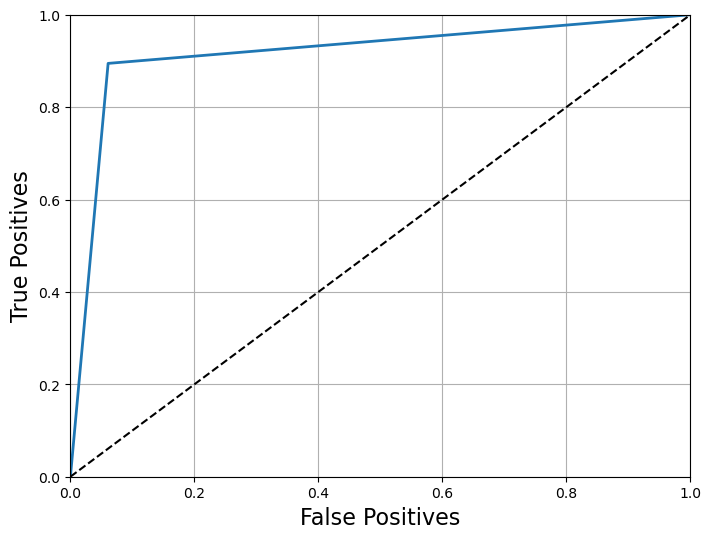

In [33]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positives', fontsize=16)
    plt.ylabel('True Positives', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [10]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': [2, 5, 10, 25, 50, 100], 'min_samples_split': [2, 3, 4]}
dec_tree_clf = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

dec_tree_clf.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Wall time: 28min 36s


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 5, 10, 25, 50, 100],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [11]:
y_pred = dec_tree_clf.predict(X_test)
acc_dec_tree = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_dec_tree

93.31

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    242656
           1       0.90      0.71      0.79     53898

    accuracy                           0.93    296554
   macro avg       0.92      0.85      0.88    296554
weighted avg       0.93      0.93      0.93    296554



In [22]:
pred_prob2 = dec_tree_clf.predict_proba(X_test)
roc_auc_score(y_test, pred_prob2[:,1])

0.9271694436361463

In [13]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=20, random_state=42)
gb_clf.fit(X_train, y_train)

Wall time: 7min 9s


GradientBoostingClassifier(n_estimators=20, random_state=42)

In [14]:
y_pred = gb_clf.predict(X_test)
acc_dec_tree = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_dec_tree

93.33

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96    242656
           1       0.92      0.69      0.79     53898

    accuracy                           0.93    296554
   macro avg       0.93      0.84      0.88    296554
weighted avg       0.93      0.93      0.93    296554



In [23]:
pred_prob2 = gb_clf.predict_proba(X_test)
roc_auc_score(y_test, pred_prob2[:,1])

0.9255289711772325

In [17]:
%%time
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(eta=0.1, max_depth=5, n_estimators=200, scale_pos_weight=2)
xgb_clf.fit(X_train, y_train)

Wall time: 9min 25s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [18]:
from sklearn.metrics import accuracy_score

y_pred = xgb_clf.predict(X_test)
acc_xgb = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_xgb

93.19

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    242656
           1       0.84      0.77      0.80     53898

    accuracy                           0.93    296554
   macro avg       0.90      0.87      0.88    296554
weighted avg       0.93      0.93      0.93    296554



In [20]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[234938,   7718],
       [ 12465,  41433]], dtype=int64)

In [21]:
from sklearn.metrics import roc_auc_score

pred_prob2 = xgb_clf.predict_proba(X_test)
roc_auc_score(y_test, pred_prob2[:,1])

0.9478646510305679

In [ ]:
(len(df.loc[(df.ARR_DEL15 == 1) & (df.DEP_DEL15 == 1)]) + len(df.loc[(df.ARR_DEL15 == 0) & (df.DEP_DEL15 == 0)])) / len(df)

In [37]:
import pickle

with open('forest_clf_pkl', 'wb') as files:
    pickle.dump(forest_clf, files)
    
with open('sgd_clf_pkl', 'wb') as files:
    pickle.dump(sgd_clf, files)
    
with open('log_reg_clf_pkl', 'wb') as files:
    pickle.dump(log_reg_clf, files)
    
with open('dec_tree_clf_pkl', 'wb') as files:
    pickle.dump(dec_tree_clf, files)
    
with open('gb_clf_pkl', 'wb') as files:
    pickle.dump(gb_clf, files)
    
with open('xgb_clf_pkl', 'wb') as files:
    pickle.dump(xgb_clf, files)

# 

# Random Forest Regressor

In [34]:
X_reg = df.loc[df.ARR_DELAY_NEW >= 15].drop(columns=['ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_TIME_Nan'])
y_reg = df.loc[df.ARR_DELAY_NEW >= 15]['ARR_DELAY_NEW']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.25, random_state=42)

In [35]:
X_reg.head()

,DEP_DELAY_NEW,DEP_DEL15,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,PRCP_DEP,SNOW_DEP,SNWD_DEP,TMAX_DEP,TMIN_DEP,WDF2_DEP,WSF2_DEP,AWND_DEP,PRCP_ARR,SNOW_ARR,SNWD_ARR,TMAX_ARR,TMIN_ARR,WDF2_ARR,WSF2_ARR,AWND_ARR,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,ARR_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST,ARR_BLOCK_HIST,DEP_AIRPORT_10140,DEP_AIRPORT_10257,DEP_AIRPORT_10299,DEP_AIRPORT_10397,DEP_AIRPORT_10423,DEP_AIRPORT_10529,DEP_AIRPORT_10599,DEP_AIRPORT_10693,DEP_AIRPORT_10713,DEP_AIRPORT_10721,DEP_AIRPORT_10792,DEP_AIRPORT_10800,DEP_AIRPORT_10821,DEP_AIRPORT_10994,DEP_AIRPORT_11042,DEP_AIRPORT_11057,DEP_AIRPORT_11066,DEP_AIRPORT_11193,DEP_AIRPORT_11259,DEP_AIRPORT_11267,DEP_AIRPORT_11278,DEP_AIRPORT_11292,DEP_AIRPORT_11298,DEP_AIRPORT_11423,DEP_AIRPORT_11433,DEP_AIRPORT_11540,DEP_AIRPORT_11618,DEP_AIRPORT_11638,DEP_AIRPORT_11697,DEP_AIRPORT_11884,DEP_AIRPORT_11986,DEP_AIRPORT_11995,DEP_AIRPORT_11996,DEP_AIRPORT_12173,DEP_AIRPORT_12191,DEP_AIRPORT_12264,DEP_AIRPORT_12266,DEP_AIRPORT_12339,DEP_AIRPORT_12451,DEP_AIRPORT_12478,DEP_AIRPORT_12758,DEP_AIRPORT_12889,DEP_AIRPORT_12892,DEP_AIRPORT_12953,DEP_AIRPORT_12954,DEP_AIRPORT_12982,DEP_AIRPORT_12992,DEP_AIRPORT_13198,DEP_AIRPORT_13204,DEP_AIRPORT_13232,DEP_AIRPORT_13244,DEP_AIRPORT_13303,DEP_AIRPORT_13342,DEP_AIRPORT_13485,DEP_AIRPORT_13487,DEP_AIRPORT_13495,DEP_AIRPORT_13577,DEP_AIRPORT_13796,DEP_AIRPORT_13830,DEP_AIRPORT_13851,DEP_AIRPORT_13871,DEP_AIRPORT_13891,DEP_AIRPORT_13930,DEP_AIRPORT_13931,DEP_AIRPORT_14027,DEP_AIRPORT_14057,DEP_AIRPORT_14100,DEP_AIRPORT_14107,DEP_AIRPORT_14122,DEP_AIRPORT_14193,DEP_AIRPORT_14262,DEP_AIRPORT_14307,DEP_AIRPORT_14321,DEP_AIRPORT_14492,DEP_AIRPORT_14524,DEP_AIRPORT_14570,DEP_AIRPORT_14576,DEP_AIRPORT_14635,DEP_AIRPORT_14679,DEP_AIRPORT_14683,DEP_AIRPORT_14685,DEP_AIRPORT_14730,DEP_AIRPORT_14747,DEP_AIRPORT_14761,DEP_AIRPORT_14771,DEP_AIRPORT_14831,DEP_AIRPORT_14869,DEP_AIRPORT_14893,DEP_AIRPORT_14908,DEP_AIRPORT_15016,DEP_AIRPORT_15096,DEP_AIRPORT_15304,DEP_AIRPORT_15370,DEP_AIRPORT_15376,DEP_AIRPORT_15412,DEP_AIRPORT_15919,ARR_AIRPORT_10140,ARR_AIRPORT_10257,ARR_AIRPORT_10299,ARR_AIRPORT_10397,ARR_AIRPORT_10423,ARR_AIRPORT_10529,ARR_AIRPORT_10599,ARR_AIRPORT_10693,ARR_AIRPORT_10713,ARR_AIRPORT_10721,ARR_AIRPORT_10792,ARR_AIRPORT_10800,ARR_AIRPORT_10821,ARR_AIRPORT_10994,ARR_AIRPORT_11042,ARR_AIRPORT_11057,ARR_AIRPORT_11066,ARR_AIRPORT_11193,ARR_AIRPORT_11259,ARR_AIRPORT_11267,ARR_AIRPORT_11278,ARR_AIRPORT_11292,ARR_AIRPORT_11298,ARR_AIRPORT_11423,ARR_AIRPORT_11433,ARR_AIRPORT_11540,ARR_AIRPORT_11618,ARR_AIRPORT_11638,ARR_AIRPORT_11697,ARR_AIRPORT_11884,ARR_AIRPORT_11986,ARR_AIRPORT_11995,ARR_AIRPORT_11996,ARR_AIRPORT_12173,ARR_AIRPORT_12191,ARR_AIRPORT_12264,ARR_AIRPORT_12266,ARR_AIRPORT_12339,ARR_AIRPORT_12451,ARR_AIRPORT_12478,ARR_AIRPORT_12758,ARR_AIRPORT_12889,ARR_AIRPORT_12892,ARR_AIRPORT_12953,ARR_AIRPORT_12954,ARR_AIRPORT_12982,ARR_AIRPORT_12992,ARR_AIRPORT_13198,ARR_AIRPORT_13204,ARR_AIRPORT_13232,ARR_AIRPORT_13244,ARR_AIRPORT_13303,ARR_AIRPORT_13342,ARR_AIRPORT_13485,ARR_AIRPORT_13487,ARR_AIRPORT_13495,ARR_AIRPORT_13577,ARR_AIRPORT_13796,ARR_AIRPORT_13830,ARR_AIRPORT_13851,ARR_AIRPORT_13871,ARR_AIRPORT_13891,ARR_AIRPORT_13930,ARR_AIRPORT_13931,ARR_AIRPORT_14027,ARR_AIRPORT_14057,ARR_AIRPORT_14100,ARR_AIRPORT_14107,ARR_AIRPORT_14122,ARR_AIRPORT_14193,ARR_AIRPORT_14262,ARR_AIRPORT_14307,ARR_AIRPORT_14321,ARR_AIRPORT_14492,ARR_AIRPORT_14524,ARR_AIRPORT_14570,ARR_AIRPORT_14576,ARR_AIRPORT_14635,ARR_AIRPORT_14679,ARR_AIRPORT_14683,ARR_AIRPORT_14685,ARR_AIRPORT_14730,ARR_AIRPORT_14747,ARR_AIRPORT_14761,ARR_AIRPORT_14771,ARR_AIRPORT_14831,ARR_AIRPORT_14869,ARR_AIRPORT_14893,ARR_AIRPORT_14908,ARR_AIRPORT_15016,ARR_AIRPORT_15096,ARR_AIRPORT_15304,ARR_AIRPORT_15370,ARR_AIRPORT_15376,ARR_AIRPORT_15412,ARR_AIRPORT_15919,DEP_TIME_0001-0559,DEP_TIME_0600-0659,DEP_TIME_0700-0759,DEP_TIME_0800-0859,DEP_TIME_0900-0959,DEP_TIME_1000-1059,DEP_TIME_1100-1159,DEP_TIME_1200-1259,DEP_TIME_1300-1359,DEP_TIME_1400-1459,DEP_TIME_1500-1559,DEP_TIME_1600-1659,DEP_TIME_1

In [51]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=20, random_state=42)
forest_reg.fit(X_reg, y_reg)

RandomForestRegressor(n_estimators=20, random_state=42)

In [52]:
from sklearn.metrics import mean_squared_error

y_pred_forest_reg = forest_reg.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_forest_reg)
rmse = mse**.5

print(mse)
print(rmse)

43.340953469137524
6.583384651464437


In [53]:
import rfpimp
rfpimp.importances(forest_reg, X_test_reg, y_test_reg).head(10)

,Importance
Feature,
DEP_DELAY_NEW,1.913051
PRCP_ARR,0.011792
PRCP_DEP,0.010544
ARR_BLOCK_HIST,0.010118
ARR_AIRPORT_HIST,0.009015
DEP_BLOCK_HIST,0.005082
DISTANCE,0.004919
CARRIER_HISTORICAL,0.003661
TMAX_DEP,0.003597


In [26]:
from sklearn.model_selection import GridSearchCV

forest_grid = { 
    'n_estimators': [10, 20, 50],
    'max_features': ['sqrt','log2'],
    'max_depth' : [5, 10, 20],
    'random_state' : [42]
}

forest_reg_cv = GridSearchCV(estimator=RandomForestRegressor(), param_grid = forest_grid, cv=5)
forest_reg_cv.fit(X_train_reg, y_train_reg)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 20, 50], 'random_state': [42]})

In [27]:
from sklearn.metrics import mean_squared_error

y_pred_reg_cv = forest_reg_cv.predict(X_test_reg)
mse_cv = mean_squared_error(y_test_reg, y_pred_reg_cv)
rmse_cv = mse_cv**.5

print(mse_cv)
print(rmse_cv)

1646.5865255464819
40.57815330379738


In [28]:
forest_reg_cv.best_estimator_

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=50,
                      random_state=42)

# XGBoost Regression 

In [36]:
%%time
from xgboost import XGBRegressor

xgb_reg2 = XGBRegressor(n_estimators=200)
xgb_reg2.fit(X_train_reg, y_train_reg)

Wall time: 2min 17s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_reg = le.fit_transform(y_train_reg)

In [40]:
%%time
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb_grid = { 
    'n_estimators': [200],
    'max_depth': [5, 7],
    'eta': [0.05, 0.1, 0.2, 0.3, 0.5],
    'random_state': [42]
}

xgb_reg = GridSearchCV(estimator=XGBRegressor(), param_grid = xgb_grid, cv=3)
xgb_reg.fit(X_train_reg, y_train_reg)

Wall time: 45min 31s


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...e,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
        

In [41]:
xgb_reg.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.2, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [49]:
xgb_reg = XGBRegressor(n_estimators=200, max_depth=7, eta=0.2, random_state=42)
xgb_reg.fit(X_train_reg, y_train_reg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.2, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [50]:
#RMSE for the grid searched model
from sklearn.metrics import mean_squared_error

y_pred_reg = xgb_reg.predict(X_test_reg)
mse_cv = mean_squared_error(y_test_reg, y_pred_reg)
rmse_cv = mse_cv**.5

print(mse_cv)
print(rmse_cv)

225.33886201983907
15.011291150991612


In [37]:
#RMSE for the standard model
y_pred_reg = xgb_reg2.predict(X_test_reg)
mse_cv = mean_squared_error(y_test_reg, y_pred_reg)
rmse_cv = mse_cv**.5

print(mse_cv)
print(rmse_cv)

226.64568805574476
15.054756326681105


In [54]:
pred_df = pd.DataFrame(y_pred_reg)
pred_df = pd.concat([pred_df, y_test_reg.reset_index()], axis=1)
pred_df.drop(columns=['index'], inplace=True)
pred_df = pd.concat([pred_df, X_test_reg['DEP_DELAY_NEW'].reset_index()], axis=1)
pred_df.reset_index()
pred_df.rename(columns={0: 'xgboost', 'ARR_DELAY_NEW': 'y_test', 'DEP_DELAY_NEW': 'dep_delay'}, inplace=True)

In [55]:
pred_forest_reg_df = pd.DataFrame(y_pred_forest_reg)
pred_df = pd.concat([pred_df, pred_forest_reg_df], axis=1)
pred_df.rename(columns={0: 'forest'}, inplace=True)
pred_df['forest'], pred_df['index'] = pred_df['index'], pred_df['forest']
pred_df.rename(columns={'index': 'forest', 'forest': 'index'}, inplace=True)
pred_df.head(10)

,xgboost,y_test,forest,dep_delay,index
0,63.068848,58.0,52.50,49.0,976813
1,30.909309,15.0,20.20,0.0,626576
2,27.085976,21.0,23.75,3.0,39178
3,19.385132,48.0,40.75,0.0,391107
4,28.439766,32.0,32.25,4.0,862697
5,35.939011,41.0,42.15,46.0,707377
6,256.201874,268.0,264.60,260.0,1181769
7,24.625969,24.0,24.55,0.0,1093154
8,37.650108,26.0,27.80,0.0,463833
9,47.165504,77.0,67.95,46.0,1150908


In [56]:
pred_df.tail(25)

,xgboost,y_test,forest,dep_delay,index
54005,166.072372,145.0,149.05,171.0,190746
54006,222.300934,246.0,237.90,226.0,1098260
54007,31.797884,23.0,26.15,4.0,993289
54008,24.097931,15.0,19.40,20.0,651923
54009,31.109547,45.0,42.85,33.0,79682
54010,125.889961,99.0,105.25,115.0,730517
54011,26.068857,18.0,19.85,16.0,1044767
54012,405.134857,402.0,403.95,404.0,1016310
54013,31.378708,15.0,17.15,0.0,36278
54014,51.303364,45.0,50.80,56.0,44064


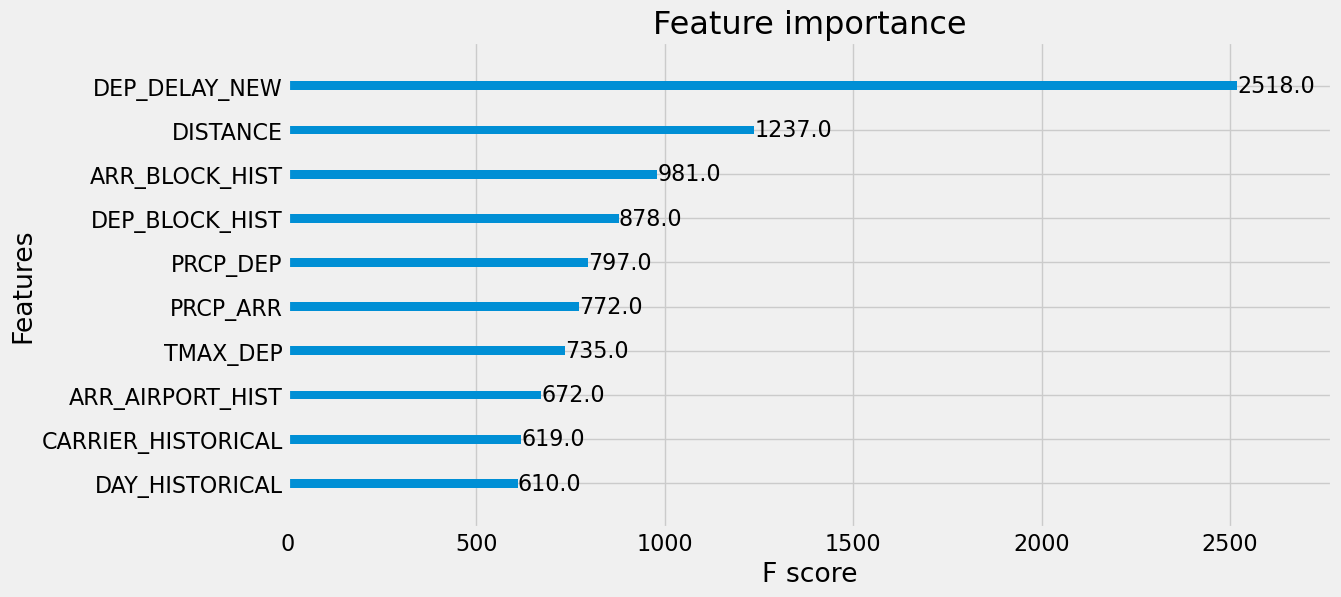

In [57]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(xgb_reg, max_num_features=10, ax=ax)
plt.show();

In [113]:
%%time
from xgboost import XGBClassifier

xgb_grid = { 
    'n_estimators': [200],
    'max_depth': [5, 7, 10],
    'eta': [0.05, 0.1, 0.2],
    'random_state': [42]
}

xgb_clf = GridSearchCV(estimator=XGBClassifier(), param_grid = xgb_grid, cv=5)
xgb_clf.fit(X_train[:100000], y_train[:100000])

Wall time: 43min 4s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...n=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_lea

In [114]:
xgb_clf.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [67]:
import pickle

with open('forest_reg_pkl', 'wb') as files:
    pickle.dump(forest_reg, files)
    
with open('xgb_reg_pkl', 'wb') as files:
    pickle.dump(xgb_reg, files)

In [58]:
y_pred = xgb_clf.predict(X_test)
acc_xgb = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_xgb

NameError: name 'xgb_clf' is not defined

In [100]:
confusion_matrix(y_test, y_pred)

array([[238634,   4022],
       [ 14445,  39453]], dtype=int64)

In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    242656
           1       0.91      0.73      0.81     53898

    accuracy                           0.94    296554
   macro avg       0.93      0.86      0.89    296554
weighted avg       0.94      0.94      0.94    296554



In [102]:
pred_prob_xgb = xgb_clf.predict_proba(X_test)
roc_auc_score(y_test, pred_prob_xgb[:,1])

0.9564741653706208

In [115]:
y_pred = xgb_clf.predict(X_test[:100000])
acc_xgb = round(accuracy_score(y_pred, y_test[:100000]) * 100, 2)
acc_xgb

93.37

In [117]:
confusion_matrix(y_test[:100000], y_pred)

array([[80451,  1330],
       [ 5303, 12916]], dtype=int64)

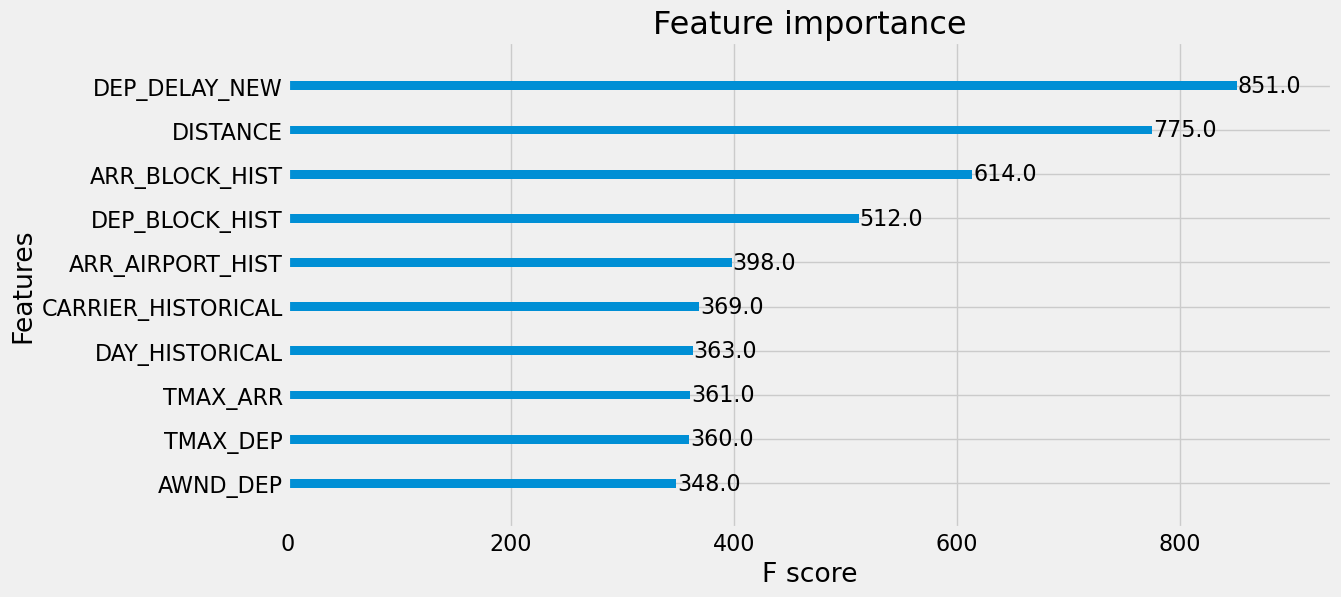

In [82]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(xgb_clf, max_num_features=10, ax=ax)
plt.show();

In [59]:
df_full = pd.read_csv('2019-airline-delays-and-cancellations/flights_table.csv')
df_full.shape

(5931063, 40)

In [60]:
df_samp = df_full.sample(frac=0.01, random_state=15)


In [61]:
df_samp.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_AIRPORT_ID,ARR_AIRPORT_ID,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,AIRLINE_ID,CARRIER_NAME,PRCP_DEP,SNOW_DEP,SNWD_DEP,TMAX_DEP,TMIN_DEP,WDF2_DEP,WSF2_DEP,AWND_DEP,PRCP_ARR,SNOW_ARR,SNWD_ARR,TMAX_ARR,TMIN_ARR,WDF2_ARR,WSF2_ARR,AWND_ARR,ARR_DEL15,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,ARR_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST,ARR_BLOCK_HIST
21238,1,20,1,14908,14771,1257.0,0.0,0.0,1300-1359,1416.0,0.0,1400-1459,372.0,2,1.0,20304,SkyWest Airlines Inc.,0.00,0.0,0.0,73.0,51.0,240.0,14.1,2.91,0.25,0.0,0.0,58.0,53.0,270.0,40.0,12.97,0,0.148681,0.116919,0.178968,0.127359,0.142004,0.118160
3411456,7,25,4,12953,14576,1013.0,3.0,0.0,1000-1059,1149.0,10.0,1100-1159,254.0,2,2.0,20363,Endeavor Air Inc.,0.00,0.0,0.0,86.0,72.0,320.0,16.1,6.26,0.00,0.0,0.0,83.0,57.0,280.0,14.1,6.71,0,0.196282,0.243160,0.250403,0.229696,0.144700,0.111795
1024485,3,29,5,13204,11618,556.0,0.0,0.0,0600-0659,840.0,4.0,0800-0859,937.0,4,1.0,19977,United Air Lines Inc.,0.00,0.0,0.0,79.0,57.0,60.0,17.0,9.84,0.00,0.0,0.0,58.0,46.0,240.0,14.1,6.49,0,0.184517,0.185090,0.265083,0.204397,0.064063,0.060502
1119189,3,13,3,12892,13487,1144.0,0.0,0.0,1100-1159,1735.0,4.0,1700-1759,1535.0,7,3.0,20416,Spirit Air Lines,0.00,0.0,0.0,68.0,54.0,280.0,30.0,11.63,0.03,0.0,0.0,79.0,68.0,170.0,33.1,18.12,0,0.131939,0.205401,0.145733,0.152191,0.165468,0.190627
433928,1,14,2,14831,12892,622.0,0.0,0.0,0600-0659,735.0,0.0,0700-0759,308.0,2,1.0,19393,Southwest Airlines Co.,0.08,0.0,0.0,57.0,48.0,150.0,21.0,8.05,1.08,0.0,0.0,57.0,51.0,60.0,23.0,8.50,0,0.124338,0.084381,0.121846,0.093747,0.053909,0.038973


In [62]:
df_samp = encode(df_samp)

In [63]:
from sklearn.model_selection import train_test_split

X_samp = df_samp.loc[df_samp.ARR_DELAY_NEW >= 15].drop(columns=['ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_TIME_Nan'])
y_samp = df_samp.loc[df_samp.ARR_DELAY_NEW >= 15]['ARR_DELAY_NEW']
X_train_samp, X_test_samp, y_train_samp, y_test_samp = train_test_split(X_samp, y_samp, test_size=0.25, random_state=33)

In [64]:
y_preg = forest_reg.predict(X_test_samp)
mse = mean_squared_error(y_test_samp, y_preg)
rmse = mse**.5

print(mse)
print(rmse)

241.3230016633635
15.534574395951873


In [65]:
y_preg = xgb_reg.predict(X_test_samp)
mse = mean_squared_error(y_test_samp, y_preg)
rmse = mse**.5

print(mse)
print(rmse)

223.90552564880127
14.963473047685195


In [66]:
X_train.head()

,DEP_DELAY_NEW,DEP_DEL15,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,PRCP_DEP,SNOW_DEP,SNWD_DEP,TMAX_DEP,TMIN_DEP,WDF2_DEP,WSF2_DEP,AWND_DEP,PRCP_ARR,SNOW_ARR,SNWD_ARR,TMAX_ARR,TMIN_ARR,WDF2_ARR,WSF2_ARR,AWND_ARR,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,ARR_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST,ARR_BLOCK_HIST,DEP_AIRPORT_10140,DEP_AIRPORT_10257,DEP_AIRPORT_10299,DEP_AIRPORT_10397,DEP_AIRPORT_10423,DEP_AIRPORT_10529,DEP_AIRPORT_10599,DEP_AIRPORT_10693,DEP_AIRPORT_10713,DEP_AIRPORT_10721,DEP_AIRPORT_10792,DEP_AIRPORT_10800,DEP_AIRPORT_10821,DEP_AIRPORT_10994,DEP_AIRPORT_11042,DEP_AIRPORT_11057,DEP_AIRPORT_11066,DEP_AIRPORT_11193,DEP_AIRPORT_11259,DEP_AIRPORT_11267,DEP_AIRPORT_11278,DEP_AIRPORT_11292,DEP_AIRPORT_11298,DEP_AIRPORT_11423,DEP_AIRPORT_11433,DEP_AIRPORT_11540,DEP_AIRPORT_11618,DEP_AIRPORT_11638,DEP_AIRPORT_11697,DEP_AIRPORT_11884,DEP_AIRPORT_11986,DEP_AIRPORT_11995,DEP_AIRPORT_11996,DEP_AIRPORT_12173,DEP_AIRPORT_12191,DEP_AIRPORT_12264,DEP_AIRPORT_12266,DEP_AIRPORT_12339,DEP_AIRPORT_12451,DEP_AIRPORT_12478,DEP_AIRPORT_12758,DEP_AIRPORT_12889,DEP_AIRPORT_12892,DEP_AIRPORT_12953,DEP_AIRPORT_12954,DEP_AIRPORT_12982,DEP_AIRPORT_12992,DEP_AIRPORT_13198,DEP_AIRPORT_13204,DEP_AIRPORT_13232,DEP_AIRPORT_13244,DEP_AIRPORT_13303,DEP_AIRPORT_13342,DEP_AIRPORT_13485,DEP_AIRPORT_13487,DEP_AIRPORT_13495,DEP_AIRPORT_13577,DEP_AIRPORT_13796,DEP_AIRPORT_13830,DEP_AIRPORT_13851,DEP_AIRPORT_13871,DEP_AIRPORT_13891,DEP_AIRPORT_13930,DEP_AIRPORT_13931,DEP_AIRPORT_14027,DEP_AIRPORT_14057,DEP_AIRPORT_14100,DEP_AIRPORT_14107,DEP_AIRPORT_14122,DEP_AIRPORT_14193,DEP_AIRPORT_14262,DEP_AIRPORT_14307,DEP_AIRPORT_14321,DEP_AIRPORT_14492,DEP_AIRPORT_14524,DEP_AIRPORT_14570,DEP_AIRPORT_14576,DEP_AIRPORT_14635,DEP_AIRPORT_14679,DEP_AIRPORT_14683,DEP_AIRPORT_14685,DEP_AIRPORT_14730,DEP_AIRPORT_14747,DEP_AIRPORT_14761,DEP_AIRPORT_14771,DEP_AIRPORT_14831,DEP_AIRPORT_14869,DEP_AIRPORT_14893,DEP_AIRPORT_14908,DEP_AIRPORT_15016,DEP_AIRPORT_15096,DEP_AIRPORT_15304,DEP_AIRPORT_15370,DEP_AIRPORT_15376,DEP_AIRPORT_15412,DEP_AIRPORT_15919,ARR_AIRPORT_10140,ARR_AIRPORT_10257,ARR_AIRPORT_10299,ARR_AIRPORT_10397,ARR_AIRPORT_10423,ARR_AIRPORT_10529,ARR_AIRPORT_10599,ARR_AIRPORT_10693,ARR_AIRPORT_10713,ARR_AIRPORT_10721,ARR_AIRPORT_10792,ARR_AIRPORT_10800,ARR_AIRPORT_10821,ARR_AIRPORT_10994,ARR_AIRPORT_11042,ARR_AIRPORT_11057,ARR_AIRPORT_11066,ARR_AIRPORT_11193,ARR_AIRPORT_11259,ARR_AIRPORT_11267,ARR_AIRPORT_11278,ARR_AIRPORT_11292,ARR_AIRPORT_11298,ARR_AIRPORT_11423,ARR_AIRPORT_11433,ARR_AIRPORT_11540,ARR_AIRPORT_11618,ARR_AIRPORT_11638,ARR_AIRPORT_11697,ARR_AIRPORT_11884,ARR_AIRPORT_11986,ARR_AIRPORT_11995,ARR_AIRPORT_11996,ARR_AIRPORT_12173,ARR_AIRPORT_12191,ARR_AIRPORT_12264,ARR_AIRPORT_12266,ARR_AIRPORT_12339,ARR_AIRPORT_12451,ARR_AIRPORT_12478,ARR_AIRPORT_12758,ARR_AIRPORT_12889,ARR_AIRPORT_12892,ARR_AIRPORT_12953,ARR_AIRPORT_12954,ARR_AIRPORT_12982,ARR_AIRPORT_12992,ARR_AIRPORT_13198,ARR_AIRPORT_13204,ARR_AIRPORT_13232,ARR_AIRPORT_13244,ARR_AIRPORT_13303,ARR_AIRPORT_13342,ARR_AIRPORT_13485,ARR_AIRPORT_13487,ARR_AIRPORT_13495,ARR_AIRPORT_13577,ARR_AIRPORT_13796,ARR_AIRPORT_13830,ARR_AIRPORT_13851,ARR_AIRPORT_13871,ARR_AIRPORT_13891,ARR_AIRPORT_13930,ARR_AIRPORT_13931,ARR_AIRPORT_14027,ARR_AIRPORT_14057,ARR_AIRPORT_14100,ARR_AIRPORT_14107,ARR_AIRPORT_14122,ARR_AIRPORT_14193,ARR_AIRPORT_14262,ARR_AIRPORT_14307,ARR_AIRPORT_14321,ARR_AIRPORT_14492,ARR_AIRPORT_14524,ARR_AIRPORT_14570,ARR_AIRPORT_14576,ARR_AIRPORT_14635,ARR_AIRPORT_14679,ARR_AIRPORT_14683,ARR_AIRPORT_14685,ARR_AIRPORT_14730,ARR_AIRPORT_14747,ARR_AIRPORT_14761,ARR_AIRPORT_14771,ARR_AIRPORT_14831,ARR_AIRPORT_14869,ARR_AIRPORT_14893,ARR_AIRPORT_14908,ARR_AIRPORT_15016,ARR_AIRPORT_15096,ARR_AIRPORT_15304,ARR_AIRPORT_15370,ARR_AIRPORT_15376,ARR_AIRPORT_15412,ARR_AIRPORT_15919,DEP_TIME_0001-0559,DEP_TIME_0600-0659,DEP_TIME_0700-0759,DEP_TIME_0800-0859,DEP_TIME_0900-0959,DEP_TIME_1000-1059,DEP_TIME_1100-1159,DEP_TIME_1200-1259,DEP_TIME_1300-1359,DEP_TIME_1400-1459,DEP_TIME_1500-1559,DEP_TIME_1600-1659,DEP_TIME_1

In [125]:
X_samp = df_samp.drop(columns=['ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_TIME_Nan'])
y_samp = df_samp['ARR_DEL15']
X_train_samp, X_test_samp, y_train_samp, y_test_samp = train_test_split(X_samp, y_samp, test_size=0.25, random_state=33)

y_preg = xgb_clf.predict(X_test_samp)
acc_xgb_samp = round(accuracy_score(y_preg, y_test_samp) * 100, 2)
acc_xgb_samp

93.63

In [126]:
confusion_matrix(y_test_samp, y_preg)

array([[11986,   180],
       [  764,  1898]], dtype=int64)